In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from common import NWSL, Fonts, Images

In [2]:
df = pd.read_csv("dob_and_minutes.csv")
df

,name,year,minutes,dob
0,Abby Elinsky,2020 Fall Series,291.0,1996-01-08
1,Abby Elinsky,2019,548.0,1996-01-08
2,Abby Elinsky,2018,32.0,1996-01-08
3,Alex Chidiac,2022,960.0,1999-01-15
4,Andressinha,2019,438.0,1995-05-01
...,...,...,...,...
2190,Zoey Goralski,2020 Challenge Cup,253.0,1995-01-22
2191,Zoey Goralski,2019,59.0,1995-01-22
2192,Évelyne Viens,2021,321.0,1997-02-06
2193,Évelyne Viens,2021 Challenge Cup,39.0,1997-02-06


In [3]:
df["dob"] = pd.to_datetime(df["dob"])
df["dob_day"] = df["dob"].dt.day
df["dob_month"] = df["dob"].dt.month
df["dob_year"] = df["dob"].dt.year
df

,name,year,minutes,dob,dob_day,dob_month,dob_year
0,Abby Elinsky,2020 Fall Series,291.0,1996-01-08,8,1,1996
1,Abby Elinsky,2019,548.0,1996-01-08,8,1,1996
2,Abby Elinsky,2018,32.0,1996-01-08,8,1,1996
3,Alex Chidiac,2022,960.0,1999-01-15,15,1,1999
4,Andressinha,2019,438.0,1995-05-01,1,5,1995
...,...,...,...,...,...,...,...
2190,Zoey Goralski,2020 Challenge Cup,253.0,1995-01-22,22,1,1995
2191,Zoey Goralski,2019,59.0,1995-01-22,22,1,1995
2192,Évelyne Viens,2021,321.0,1997-02-06,6,2,1997
2193,Évelyne Viens,2021 Challenge Cup,39.0,1997-02-06,6,2,1997


In [15]:
df.drop(columns=["year", "minutes"]).drop_duplicates()

,name,dob,dob_day,dob_month,dob_year
0,Abby Elinsky,1996-01-08,8,1,1996
3,Alex Chidiac,1999-01-15,15,1,1999
4,Andressinha,1995-05-01,1,5,1995
8,Camila,1994-10-10,10,10,1994
11,Celia,1995-06-20,20,6,1995
...,...,...,...,...,...
2182,Zoe Clark,1995-02-10,10,2,1995
2183,Zoe Morse,1998-04-01,1,4,1998
2188,Zoe Redei,1997-10-08,8,10,1997
2189,Zoey Goralski,1995-01-22,22,1,1995


<ipython-input-16-085cb80d8307>:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 720x504 with 0 Axes>

<Figure size 12000x8400 with 0 Axes>

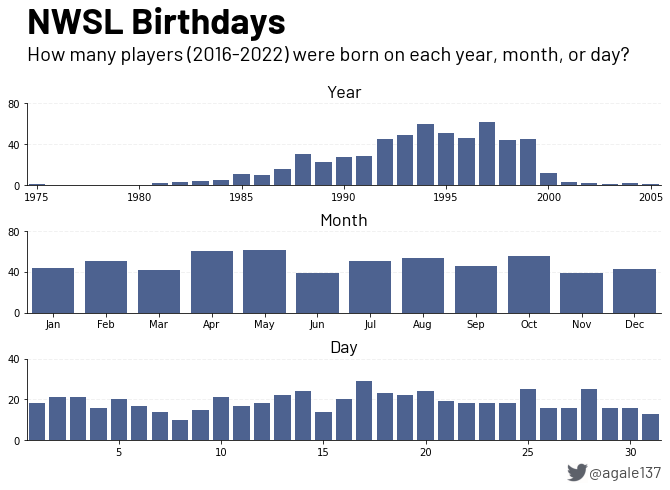

In [16]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 7)
plt.figure(dpi=1200, facecolor="white")
fig, axs = plt.subplots(4, 1, height_ratios=[1, 5, 5, 5])
fig.patch.set_facecolor("white")


def plot_metric(ax, m):
    # Group data
    df_group = (
        df.drop(columns=["year", "minutes"])
        .drop_duplicates()
        .groupby("dob_" + m)
        .agg(count=("name", "count"))
        .reset_index()
    )

    # Plot data
    ax.bar(df_group["dob_" + m], df_group["count"], color="#4d6290")

    # Title
    ax.set_title(
        m.capitalize(),
        fontproperties=Fonts.BARLOW,
        size=18,
    )

    # Ticks and axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlim(df_group["dob_" + m].min() - 0.5, df_group["dob_" + m].max() + 0.5)
    ymax = math.ceil(df_group["count"].max() / 20) * 20
    ax.set_ylim(0, ymax)
    ax.set_yticks([0, ymax / 2, ymax])
    if m == "month":
        ax.set_xticks(range(1, 12 + 1))
        ax.set_xticklabels(
            [
                "Jan",
                "Feb",
                "Mar",
                "Apr",
                "May",
                "Jun",
                "Jul",
                "Aug",
                "Sep",
                "Oct",
                "Nov",
                "Dec",
            ]
        )
    ax.set_axisbelow(True)
    ax.grid(which="both", axis="y", ls="--", color="#F1F1F1", linewidth=1)


# Plot each metric
plot_metric(axs[1], "year")
plot_metric(axs[2], "month")
plot_metric(axs[3], "day")

# Title
axs[0].axis("off")
axs[0].set_title(
    "NWSL Birthdays", fontproperties=Fonts.BARLOW_BOLD, size=36, ha="left", x=0, y=1.1
)

# Subtitle
axs[0].text(
    0,
    -0.2,
    "How many players (2016-2022) were born on each year, month, or day?",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
    transform=axs[0].transAxes,
)

# Twitter logo and username
plt.text(
    1,
    -0.4,
    "@agale137",
    transform=axs[3].transAxes,
    color="black",
    fontsize=16,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.78, 0.033, 0.04, 0.04], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Proper spacing between subplots
fig.tight_layout()

# Save image
plt.savefig(
    "nwsl_birthdays.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)

<ipython-input-29-e69f86536e50>:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 720x720 with 0 Axes>

<Figure size 12000x12000 with 0 Axes>

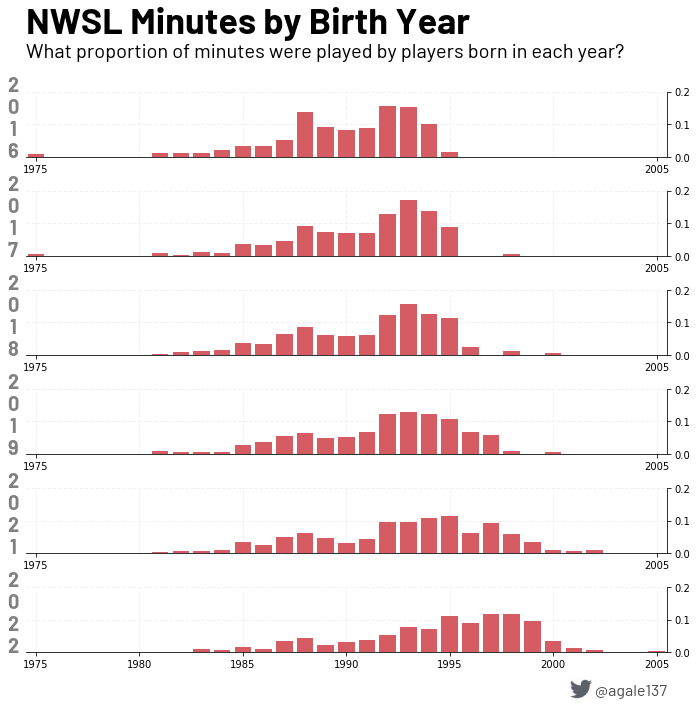

In [29]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 10)
plt.figure(dpi=1200, facecolor="white")
fig, axs = plt.subplots(7, 1, height_ratios=[1, 5, 5, 5, 5, 5, 5])
fig.patch.set_facecolor("white")


def plot_metric(ax, year):
    # Group data
    df_group = (
        df[df["year"] == str(year)]
        .groupby("dob_year")
        .agg(minutes=("minutes", "sum"))
        .reset_index()
    )
    df_group["minutes"] = df_group["minutes"] / df_group["minutes"].sum()

    # Plot data
    ax.bar(df_group["dob_year"], df_group["minutes"], color="#d55c62")

    # Title
    ax.text(
        -0.02,
        0,
        "\n".join(list(str(year))),
        fontproperties=Fonts.BARLOW_BOLD,
        size=20,
        ha="center",
        transform=ax.transAxes,
        color="gray",
    )

    # Ticks and axes
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.tick_params(right=True, left=False, labelleft=False, labelright=True)
    ax.set_ylim(0, 0.2)
    ax.set_yticks([0, 0.1, 0.2])
    ax.set_xlim(df["dob_year"].min() - 0.5, df["dob_year"].max() + 0.5)
    if year != 2022:
        ax.set_xticks([df["dob_year"].min(), df["dob_year"].max()])
        ax.set_xticks(range(1975, 2005, 5), minor=True)
        for tick in ax.xaxis.get_minor_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(which="both", axis="both", ls="--", color="#F1F1F1", linewidth=1)


# Plot each metric
for i, year in enumerate(filter(lambda x: x != 2020, range(2016, 2023))):
    plot_metric(axs[i + 1], year)

# Title
axs[0].axis("off")
axs[0].set_title(
    "NWSL Minutes by Birth Year",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.4,
)

# Subtitle
axs[0].text(
    0,
    0,
    "What proportion of minutes were played by players born in each year?",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
    transform=axs[0].transAxes,
)

# Twitter logo and username
plt.text(
    1,
    -0.6,
    "@agale137",
    transform=axs[6].transAxes,
    color="black",
    fontsize=16,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.795, 0.021, 0.03, 0.03], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Proper spacing between subplots
fig.tight_layout()

# Save image
plt.savefig("nwsl_minutes_by_year.png", bbox_inches="tight", pad_inches=0.5, dpi=200)